In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon 
import json
import os
from PIL import Image,ImageDraw
import cv2
from tqdm import tqdm

In [2]:
json_name = r'/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/OG_img_json/back1.json'

In [3]:
file = r'/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/OG_img_json/back1.jpg'

In [4]:
print(json_name)
# file_n=open("/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/{}.json".format(json_name.split(".")[0]))
reading_file = open(json_name)
part_prediction=json.load(reading_file)
right = 32
left = 32
top = 32
bottom = 32

/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/OG_img_json/back1.json


In [5]:
part_prediction.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth', 'lineColor', 'fillColor'])

In [8]:
# part_prediction['shapes'][0]['points']

In [9]:
image = Image.open(file)
width, height = image.size
new_width = width + right + left
new_height = height + top + bottom

In [10]:
width, height

(640, 480)

In [11]:
new_width, new_height

(704, 544)

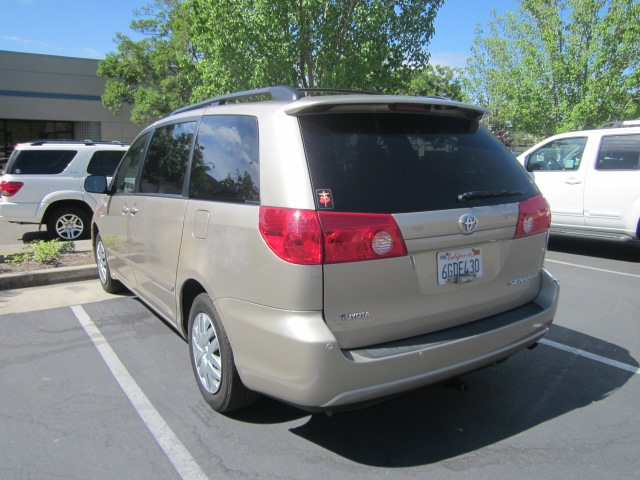

In [12]:
image

In [13]:
result = Image.new(image.mode, (new_width, new_height), (0, 0, 0))

In [14]:
left

32

In [15]:
top

32

In [16]:
result.paste(image, (left, top))

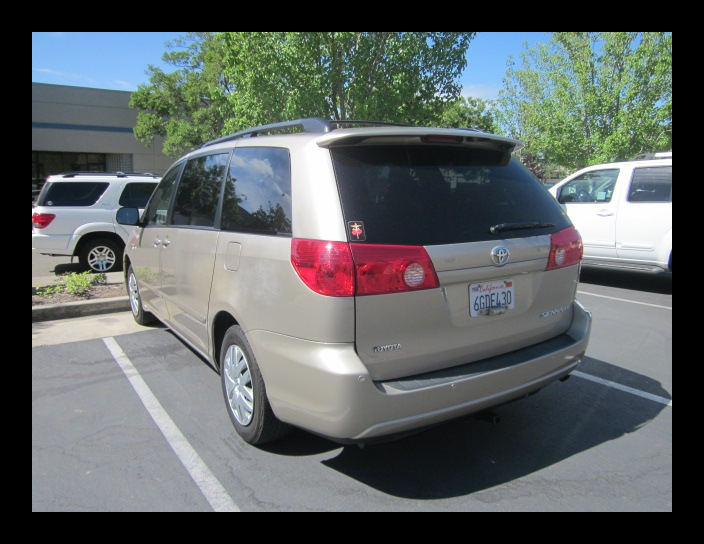

In [17]:
result

In [18]:
padded_image_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/padded_img/padded_back1.jpg"
result.save(padded_image_path)
cv2_img = cv2.imread(padded_image_path)

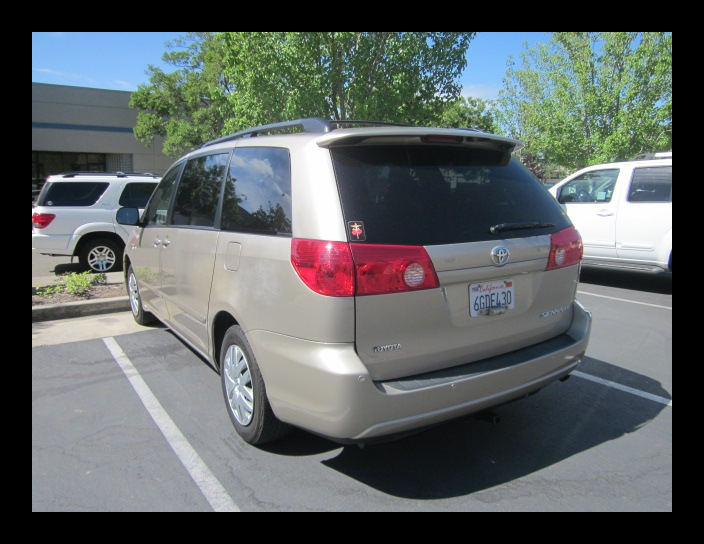

In [19]:
result

In [369]:
# padded_image_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/padded_back1.jpg"
for mask_id in tqdm(part_prediction["shapes"]):
    poly_points=mask_id["points"]
    add_pad_to_point=[]
    for org_point in poly_points:
        add_pad_to_point.append([org_point[0]+32,org_point[1]+32])
    points = np.array(add_pad_to_point)
#         gray_image = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
    binary_mask=np.zeros(cv2_img.shape,dtype=np.int32)
    cv2.fillPoly(binary_mask, pts=np.int32([points]), color=(255,255,255))
    binary_mask_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/binary_images/binary_back1.jpg"
#         print(binary_mask.shape)
    cv2.imwrite(binary_mask_path,binary_mask)
    original_padded_image=Image.open(padded_image_path)
    single_part_mask_image=Image.open(binary_mask_path)
    for point_id in range(len(poly_points)):
        p=poly_points[point_id]
        padded_point=[p[0]+32,p[1]+32]
        original_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/patch/{}#{}#back1.jpg".format(mask_id["label"],point_id)
        masked_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/binary/{}#{}#bin_back1.jpg".format(mask_id["label"],point_id)
        original_img_cropped=original_padded_image.crop((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32)))
        original_img_cropped.save(original_img_cropped_path)
        masked_img_cropped=single_part_mask_image.crop((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32)))
        masked_img_cropped.save(masked_img_cropped_path)

100%|██████████| 12/12 [00:00<00:00, 23.01it/s]


In [371]:
patch_path = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/binary/'
all_bin_patch_img = os.listdir(patch_path)

In [372]:
empty_patches = []
for each_patch in tqdm(range(0,len(all_bin_patch_img))):
    try:
        image = np.array(Image.open(patch_path+all_bin_patch_img[each_patch]))
        total_sum = image.sum()
        if total_sum == 0:
            empty_patches.append(each_patch)
    except:
        print(each_patch)

100%|██████████| 356/356 [00:00<00:00, 3084.96it/s]


In [374]:
empty_patches

[]

# Creating Data

In [20]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon 
import json
import os
from PIL import Image,ImageDraw
import cv2
from tqdm import tqdm

In [376]:
files_path = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/images/'

In [377]:
creating_data_files = os.listdir(files_path)
creating_data_files = [each_file for each_file in creating_data_files if each_file.endswith('jpg') or each_file.endswith('json') or each_file.endswith('JPG')]

In [378]:
len(creating_data_files)

500

In [383]:
# import shutil
# shutil.rmtree('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch/')

In [384]:
def splits_fun(x):
    return x.split('.')[-1]
pd.Series(creating_data_files).apply(splits_fun).value_counts()

json    250
jpg     205
JPG      45
dtype: int64

In [385]:
right = 32
left = 32
top = 32
bottom = 32
patch_size = 64
patch_tile_size = int(patch_size/2)

In [429]:
done_img = []

In [391]:
all_images_files = [each_file for each_file in creating_data_files if each_file.endswith(('jpg','JPG'))]
all_images_files

['car#151.JPG',
 'car#108.jpg',
 'car#127.jpg',
 'car#235.jpg',
 'car#105.jpg',
 'car#101.jpg',
 'car#28.JPG',
 'car#90.JPG',
 'car#184.jpg',
 'car#62.jpg',
 'car#221.jpg',
 'car#73.jpg',
 'car#19.jpg',
 'car#202.jpg',
 'car#7.jpg',
 'car#18.JPG',
 'car#106.jpg',
 'car#238.jpg',
 'car#192.jpg',
 'car#110.jpg',
 'car#50.jpg',
 'car#234.JPG',
 'car#191.jpg',
 'car#145.jpg',
 'car#122.jpg',
 'car#183.jpg',
 'car#77.jpg',
 'car#65.jpg',
 'car#8.jpg',
 'car#25.jpg',
 'car#239.jpg',
 'car#17.jpg',
 'car#153.jpg',
 'car#210.jpg',
 'car#189.JPG',
 'car#107.jpg',
 'car#12.jpg',
 'car#219.JPG',
 'car#104.jpg',
 'car#177.jpg',
 'car#204.jpg',
 'car#6.JPG',
 'car#155.jpg',
 'car#187.jpg',
 'car#152.jpg',
 'car#162.jpg',
 'car#87.jpg',
 'car#116.jpg',
 'car#46.jpg',
 'car#225.jpg',
 'car#99.jpg',
 'car#89.JPG',
 'car#215.jpg',
 'car#49.jpg',
 'car#14.jpg',
 'car#134.jpg',
 'car#3.jpg',
 'car#61.jpg',
 'car#97.jpg',
 'car#243.jpg',
 'car#109.jpg',
 'car#250.JPG',
 'car#63.jpg',
 'car#211.JPG',
 'car

In [1]:
import os

def delete_files_in_folder(folder_path):
    """
    Delete all files in a folder.

    Args:
        folder_path (str): The path to the folder where you want to delete files.
    """
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            try:
                if os.path.isfile(file_path):
                    os.remove(file_path)  # Delete the file
                elif os.path.isdir(file_path):
                    os.rmdir(file_path)  # Delete a directory (if needed)
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")
    else:
        print(f"The folder path '{folder_path}' does not exist or is not a directory.")

In [4]:
# Example usage:
# binary_patch
# img_patch
folder_path = "/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/model_train_data/Patches/"  # Replace with the path to your folder
delete_files_in_folder(folder_path)

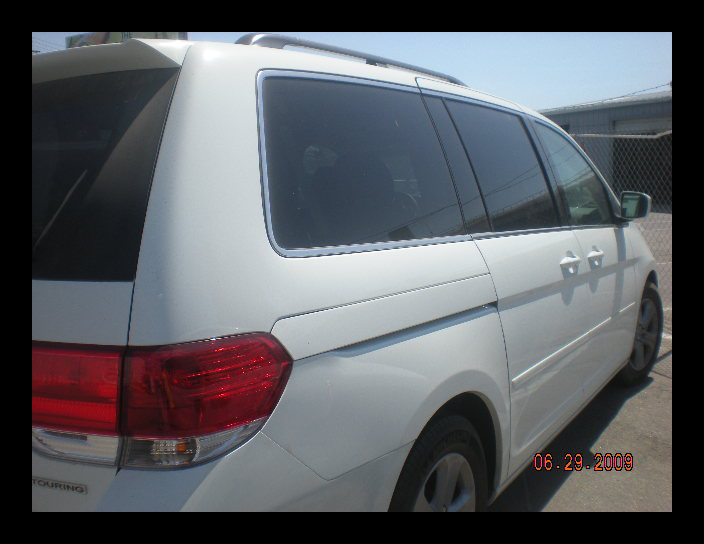

In [401]:
current_image_padded

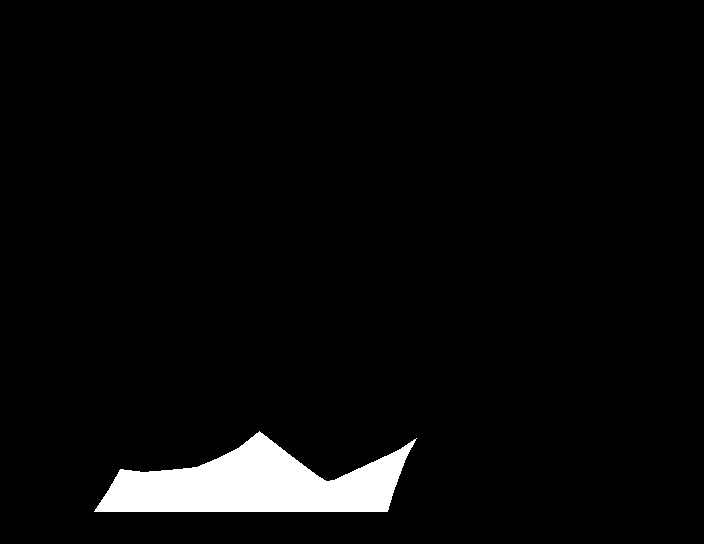

In [400]:
current_single_part_mask_image_read

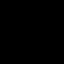

In [398]:
masked_img_cropped

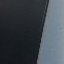

In [399]:
og_img_cropped

In [403]:
current_p

[111.40624999999999, 440.234375]

In [407]:
# Define the point coordinates (x, y)
point = (current_p[0]+patch_tile_size , current_p[1]+patch_tile_size)  # Replace with your actual coordinates

# Set the color and thickness for the point
color = (0, 0, 255)  # Red color in BGR format
thickness = -1  # Filled circle

# Draw the point on the image
cv2.circle(current_image_padded, point, radius=5, color=color, thickness=thickness)

TypeError: Expected cv::UMat for argument 'img'

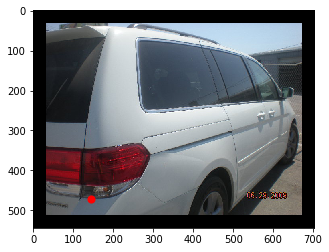

In [409]:
plt.imshow(current_image_padded)
plt.scatter(point[0], point[1], c='red', s=50)

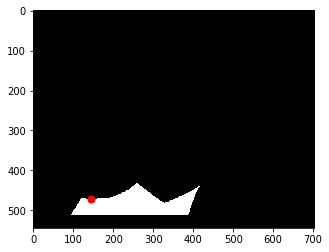

In [410]:
plt.imshow(current_single_part_mask_image_read)
plt.scatter(point[0], point[1], c='red', s=50)

In [ ]:
current_single_part_mask_image_read

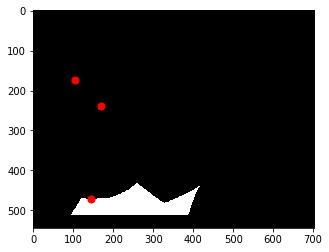

In [419]:
plt.imshow(current_single_part_mask_image_read)
plt.scatter(point[0], point[1], c='red', s=50)
plt.scatter(int(padded_point[0]-32), int(padded_point[1]-32), c='red', s=50)
plt.scatter(int(padded_point[0]+32), int(padded_point[1]+32), c='red', s=50)

In [423]:
poly_points[point_id]

[111.40624999999999, 440.234375]

In [ ]:
(int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))

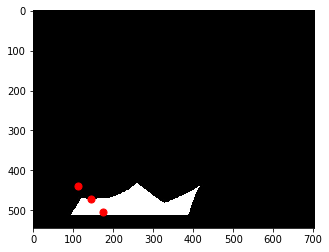

In [442]:
plt.imshow(current_single_part_mask_image_read)
plt.scatter(current_padded_point[0], current_padded_point[1], c='red', s=50)
plt.scatter(int(current_padded_point[0]-32), int(current_padded_point[1]-32), c='red', s=50)
plt.scatter(int(current_padded_point[0]+32), int(current_padded_point[1]+32), c='red', s=50)

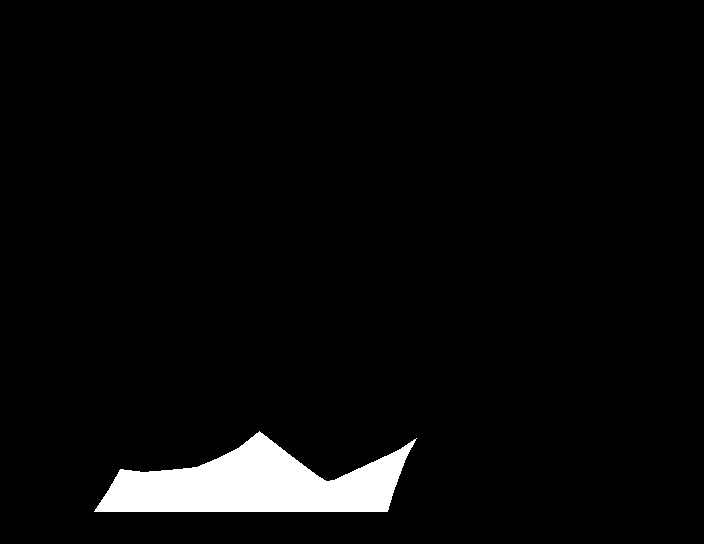

In [443]:
current_single_part_mask_image_read

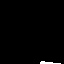

In [446]:
current_single_part_mask_image_read.crop((int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[0]-32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[1]-32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[0]+32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[1]+32)))

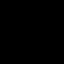

In [445]:
current_single_part_mask_image_read.crop((int((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))[0]-32), int((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))[1]-32), int((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))[0]+32), int((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))[1]+32)))

In [ ]:
rear_bumper#19#car#127.jpg

In [447]:
masked_img_cropped_path

'/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch/rear_bumper#19#car#127.jpg'

In [ ]:
# current_p = poly_points[point_id]
# current_padded_point = [current_p[0]+patch_tile_size , current_p[1]+patch_tile_size]

In [425]:
current_padded_point

[143.40625, 472.234375]

In [420]:
point[0], point[1]

(143.40625, 472.234375)

In [421]:
int(padded_point[0]-32), int(padded_point[1]-32)

(105, 174)

In [422]:
int(padded_point[0]+32), int(padded_point[1]+32)

(169, 238)

ValueError: too many values to unpack (expected 2)

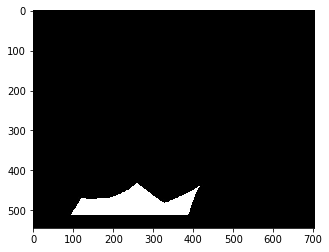

In [412]:
plt.imshow(current_single_part_mask_image_read)
x, y = zip(*[(int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))])  # Separate x and y coordinates
plt.scatter(x, y, c='red', s=50) 

In [413]:
(int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32))

(105, 174, 169, 238)

In [ ]:
cv2.circle(image, (x,y), radius=0, color=(0, 0, 255), thickness=-1)


In [ ]:
current_padded_point = [current_p[0]+patch_tile_size , current_p[1]+patch_tile_size]
og_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch/{}#{}#{}.jpg".format(mask_id["label"], point_id, current_file_name)
masked_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch/{}#{}#{}.jpg".format(mask_id["label"],point_id, current_file_name)

og_img_cropped=current_image_padded.crop((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32)))
og_img_cropped.save(og_img_cropped_path)

In [440]:
done_img = []

In [453]:
binary_single_part_mask_path = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_single_part_mask/'
for each_og_img in tqdm(all_images_files):
    current_file_name = each_og_img.split('.')[0]
    current_file_ext = each_og_img.split('.')[-1]
    if current_file_name not in done_img:
        print(current_file_name)
        current_img_read = Image.open(files_path+current_file_name+'.'+current_file_ext)
        reading_current_json_file = open(files_path+current_file_name+'.json')
        current_img_json = json.load(reading_current_json_file)
        width, height = current_img_read.size
        new_width = width + right + left
        new_height = height + top + bottom
        current_image_padded = Image.new(current_img_read.mode, (new_width, new_height), (0, 0, 0))
        current_image_padded.paste(current_img_read, (left, top))
        
        for mask_id in current_img_json["shapes"]:
            poly_points=mask_id["points"]
            add_pad_to_point=[]
            for org_point in poly_points:
                add_pad_to_point.append([org_point[0]+patch_tile_size,org_point[1]+patch_tile_size])
            points = np.array(add_pad_to_point)
            
            single_part_mask_image=np.zeros(np.array(current_image_padded).shape,dtype=np.int32)
            cv2.fillPoly(single_part_mask_image, pts=np.int32([points]), color=(255,255,255))
            current_binary_single_part_mask = "{}#{}#{}.jpg".format(binary_single_part_mask_path, mask_id["label"], current_file_name)
            cv2.imwrite(current_binary_single_part_mask,single_part_mask_image)
            current_single_part_mask_image_read =Image.open(current_binary_single_part_mask)

            for point_id in range(len(poly_points)):
                current_p = poly_points[point_id]
                current_padded_point = [current_p[0]+patch_tile_size , current_p[1]+patch_tile_size]
                og_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch/{}#{}#{}.jpg".format(mask_id["label"], point_id, current_file_name)
                masked_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch/{}#{}#{}.jpg".format(mask_id["label"],point_id, current_file_name)
               
                og_img_cropped=current_image_padded.crop((int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[0]-32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[1]-32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[0]+32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[1]+32)))
                og_img_cropped.save(og_img_cropped_path)
                # single_part_mask_image_pillow = Image.fromarray(np.uint8(single_part_mask_image)).convert('RGB')
                masked_img_cropped=current_single_part_mask_image_read.crop((int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[0]-32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[1]-32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[0]+32), int((int(current_padded_point[0]-32), int(current_padded_point[1]-32), int(current_padded_point[0]+32), int(current_padded_point[1]+32))[1]+32)))
                masked_img_cropped.save(masked_img_cropped_path)
    done_img.append(current_file_name)

  0%|          | 0/250 [00:00<?, ?it/s]

car#235


  2%|▏         | 4/250 [00:00<00:26,  9.19it/s]

car#105


  2%|▏         | 5/250 [00:00<00:33,  7.25it/s]

car#101


  2%|▏         | 6/250 [00:00<00:48,  5.00it/s]

car#28


  3%|▎         | 7/250 [00:01<01:00,  4.02it/s]

car#90


  4%|▎         | 9/250 [00:01<00:51,  4.64it/s]

car#184
car#62


  4%|▍         | 10/250 [00:01<00:47,  5.01it/s]

car#221


  4%|▍         | 11/250 [00:02<00:59,  4.00it/s]

car#73


  5%|▍         | 12/250 [00:02<01:02,  3.80it/s]

car#19


  5%|▌         | 13/250 [00:02<01:13,  3.24it/s]

car#202
car#7


  6%|▋         | 16/250 [00:03<00:53,  4.36it/s]

car#18
car#106


  7%|▋         | 18/250 [00:03<00:52,  4.43it/s]

car#238
car#192
car#110


  8%|▊         | 20/250 [00:04<00:49,  4.60it/s]

car#50
car#234


  9%|▉         | 22/250 [00:04<00:43,  5.30it/s]

car#191


 10%|▉         | 24/250 [00:05<00:46,  4.85it/s]

car#145
car#122


 10%|█         | 25/250 [00:05<00:44,  5.03it/s]

car#183


 10%|█         | 26/250 [00:05<00:48,  4.64it/s]

car#77


 11%|█         | 27/250 [00:05<00:54,  4.08it/s]

car#65


 11%|█         | 28/250 [00:05<00:52,  4.24it/s]

car#8


 12%|█▏        | 29/250 [00:06<00:59,  3.69it/s]

car#25


 12%|█▏        | 30/250 [00:06<00:56,  3.87it/s]

car#239


 13%|█▎        | 32/250 [00:06<00:46,  4.70it/s]

car#17
car#153


 13%|█▎        | 33/250 [00:07<00:48,  4.44it/s]

car#210


 14%|█▎        | 34/250 [00:07<00:56,  3.84it/s]

car#189


 14%|█▍        | 35/250 [00:08<01:11,  3.00it/s]

car#107


 14%|█▍        | 36/250 [00:08<01:06,  3.21it/s]

car#12


 15%|█▍        | 37/250 [00:08<01:08,  3.12it/s]

car#219


 16%|█▌        | 39/250 [00:08<00:51,  4.06it/s]

car#104
car#177


 16%|█▌        | 40/250 [00:09<01:02,  3.37it/s]

car#204


 16%|█▋        | 41/250 [00:09<01:03,  3.27it/s]

car#6


 17%|█▋        | 43/250 [00:10<00:54,  3.76it/s]

car#155
car#187


 18%|█▊        | 45/250 [00:10<00:49,  4.12it/s]

car#152
car#162


 19%|█▉        | 47/250 [00:11<00:47,  4.24it/s]

car#87
car#116


 19%|█▉        | 48/250 [00:11<00:50,  4.01it/s]

car#46


 20%|█▉        | 49/250 [00:11<00:54,  3.69it/s]

car#225


 20%|██        | 50/250 [00:12<00:51,  3.87it/s]

car#99


 21%|██        | 52/250 [00:12<00:46,  4.21it/s]

car#89
car#215


 21%|██        | 53/250 [00:12<00:51,  3.82it/s]

car#49


 22%|██▏       | 54/250 [00:13<00:49,  3.95it/s]

car#14


 22%|██▏       | 56/250 [00:13<00:41,  4.71it/s]

car#134
car#3


 23%|██▎       | 58/250 [00:13<00:40,  4.72it/s]

car#61
car#97


 24%|██▎       | 59/250 [00:14<00:47,  4.01it/s]

car#243


 24%|██▍       | 61/250 [00:14<00:41,  4.51it/s]

car#109
car#250


 25%|██▍       | 62/250 [00:14<00:44,  4.22it/s]

car#63


 25%|██▌       | 63/250 [00:15<00:46,  3.98it/s]

car#211


 26%|██▌       | 64/250 [00:15<00:56,  3.28it/s]

car#227


 26%|██▌       | 65/250 [00:15<00:59,  3.09it/s]

car#245


 26%|██▋       | 66/250 [00:16<00:58,  3.13it/s]

car#35


 27%|██▋       | 67/250 [00:16<00:52,  3.46it/s]

car#21


 27%|██▋       | 68/250 [00:16<01:00,  3.03it/s]

car#199


 28%|██▊       | 70/250 [00:17<00:48,  3.71it/s]

car#157
car#232


 28%|██▊       | 71/250 [00:17<00:50,  3.57it/s]

car#92


 29%|██▉       | 72/250 [00:17<00:49,  3.61it/s]

car#224


 30%|███       | 75/250 [00:18<00:47,  3.72it/s]

car#248
car#4
car#66


 30%|███       | 76/250 [00:19<00:53,  3.27it/s]

car#81


 31%|███       | 77/250 [00:19<00:49,  3.50it/s]

car#119


 32%|███▏      | 79/250 [00:19<00:43,  3.93it/s]

car#237
car#230


 32%|███▏      | 80/250 [00:19<00:43,  3.91it/s]

car#176


 32%|███▏      | 81/250 [00:20<00:45,  3.68it/s]

car#82


 33%|███▎      | 83/250 [00:20<00:43,  3.82it/s]

car#166
car#42


 34%|███▎      | 84/250 [00:21<00:44,  3.69it/s]

car#95


 34%|███▍      | 85/250 [00:21<00:45,  3.66it/s]

car#216


 34%|███▍      | 86/250 [00:21<00:46,  3.52it/s]

car#91


 35%|███▌      | 88/250 [00:22<00:43,  3.72it/s]

car#236
car#57


 36%|███▋      | 91/250 [00:22<00:34,  4.64it/s]

car#1
car#93
car#32


 37%|███▋      | 93/250 [00:22<00:25,  6.10it/s]

car#60
car#68


 38%|███▊      | 94/250 [00:23<00:38,  4.09it/s]

car#130


 38%|███▊      | 95/250 [00:23<00:41,  3.69it/s]

car#83


 38%|███▊      | 96/250 [00:24<00:45,  3.37it/s]

car#226


 39%|███▉      | 97/250 [00:24<00:47,  3.19it/s]

car#150


 40%|███▉      | 99/250 [00:24<00:43,  3.43it/s]

car#201
car#240


 40%|████      | 100/250 [00:25<00:36,  4.11it/s]

car#24
car#173


 41%|████      | 102/250 [00:25<00:33,  4.40it/s]

car#48


 42%|████▏     | 104/250 [00:25<00:32,  4.55it/s]

car#84
car#149


 42%|████▏     | 106/250 [00:26<00:31,  4.62it/s]

car#212
car#117


 43%|████▎     | 107/250 [00:26<00:29,  4.86it/s]

car#140


 44%|████▍     | 110/250 [00:27<00:30,  4.62it/s]

car#179
car#78


 44%|████▍     | 111/250 [00:27<00:31,  4.44it/s]

car#34
car#9
car#208


 45%|████▌     | 113/250 [00:27<00:27,  5.02it/s]

car#143


 46%|████▌     | 114/250 [00:27<00:28,  4.72it/s]

car#172


 46%|████▋     | 116/250 [00:28<00:25,  5.27it/s]

car#231
car#135


 47%|████▋     | 118/250 [00:28<00:23,  5.55it/s]

car#100
car#163


 48%|████▊     | 119/250 [00:28<00:22,  5.77it/s]

car#80


 48%|████▊     | 120/250 [00:29<00:25,  5.08it/s]

car#44


 48%|████▊     | 121/250 [00:29<00:30,  4.23it/s]

car#242


 49%|████▉     | 123/250 [00:29<00:28,  4.47it/s]

car#126
car#197


 50%|████▉     | 124/250 [00:30<00:33,  3.73it/s]

car#142
car#180


 50%|█████     | 126/250 [00:30<00:27,  4.55it/s]

car#132
car#171


 52%|█████▏    | 130/250 [00:30<00:19,  6.06it/s]

car#168
car#217
car#178


 53%|█████▎    | 132/250 [00:31<00:22,  5.27it/s]

car#223
car#124


 53%|█████▎    | 133/250 [00:31<00:25,  4.59it/s]

car#209


 54%|█████▍    | 135/250 [00:32<00:21,  5.41it/s]

car#136
car#118


 54%|█████▍    | 136/250 [00:32<00:24,  4.59it/s]

car#194
car#120


 55%|█████▌    | 138/250 [00:32<00:23,  4.82it/s]

car#71


 56%|█████▌    | 140/250 [00:33<00:24,  4.41it/s]

car#220
car#214


 57%|█████▋    | 142/250 [00:33<00:24,  4.38it/s]

car#37
car#111


 58%|█████▊    | 144/250 [00:34<00:21,  4.86it/s]

car#141
car#47


 58%|█████▊    | 145/250 [00:34<00:20,  5.06it/s]

car#22


 59%|█████▉    | 147/250 [00:34<00:19,  5.23it/s]

car#52
car#11


 60%|█████▉    | 149/250 [00:34<00:18,  5.50it/s]

car#23
car#146


 60%|██████    | 151/250 [00:35<00:19,  5.16it/s]

car#88
car#5


 61%|██████    | 153/250 [00:35<00:21,  4.41it/s]

car#40
car#137


 62%|██████▏   | 154/250 [00:36<00:24,  3.86it/s]

car#31


 62%|██████▏   | 156/250 [00:36<00:20,  4.57it/s]

car#182
car#96


 63%|██████▎   | 158/250 [00:36<00:16,  5.60it/s]

car#10
car#115


 64%|██████▎   | 159/250 [00:37<00:23,  3.89it/s]

car#196


 64%|██████▍   | 160/250 [00:37<00:23,  3.78it/s]

car#198


 65%|██████▍   | 162/250 [00:38<00:19,  4.44it/s]

car#165
car#58


 65%|██████▌   | 163/250 [00:38<00:21,  4.03it/s]

car#129


 66%|██████▌   | 164/250 [00:38<00:23,  3.69it/s]

car#222


 66%|██████▌   | 165/250 [00:39<00:24,  3.53it/s]

car#160


 66%|██████▋   | 166/250 [00:39<00:24,  3.45it/s]

car#125


 67%|██████▋   | 168/250 [00:39<00:19,  4.12it/s]

car#185
car#74


 68%|██████▊   | 169/250 [00:40<00:21,  3.76it/s]

car#139


 68%|██████▊   | 171/250 [00:40<00:19,  4.09it/s]

car#167
car#218


 69%|██████▉   | 173/250 [00:41<00:17,  4.36it/s]

car#41
car#175


 70%|██████▉   | 174/250 [00:41<00:22,  3.43it/s]

car#203


 70%|███████   | 175/250 [00:41<00:21,  3.46it/s]

car#170


 70%|███████   | 176/250 [00:41<00:19,  3.75it/s]

car#94


 71%|███████   | 177/250 [00:42<00:23,  3.17it/s]

car#164


 72%|███████▏  | 179/250 [00:42<00:17,  3.98it/s]

car#133
car#147


 72%|███████▏  | 180/250 [00:43<00:17,  4.05it/s]

car#86
car#30


 73%|███████▎  | 182/250 [00:43<00:14,  4.55it/s]

car#102


 73%|███████▎  | 183/250 [00:43<00:14,  4.58it/s]

car#2


 74%|███████▍  | 185/250 [00:43<00:14,  4.63it/s]

car#55
car#193


 74%|███████▍  | 186/250 [00:44<00:13,  4.73it/s]

car#228


 75%|███████▍  | 187/250 [00:44<00:13,  4.65it/s]

car#33


 75%|███████▌  | 188/250 [00:44<00:14,  4.31it/s]

car#188


 76%|███████▌  | 189/250 [00:44<00:14,  4.13it/s]

car#27


 76%|███████▋  | 191/250 [00:45<00:13,  4.53it/s]

car#246
car#121


 77%|███████▋  | 192/250 [00:45<00:13,  4.35it/s]

car#229


 77%|███████▋  | 193/250 [00:45<00:12,  4.44it/s]

car#53


 78%|███████▊  | 195/250 [00:46<00:11,  4.68it/s]

car#29
car#169


 79%|███████▉  | 197/250 [00:46<00:11,  4.68it/s]

car#123
car#16


 79%|███████▉  | 198/250 [00:47<00:12,  4.16it/s]

car#138


 80%|███████▉  | 199/250 [00:47<00:12,  4.07it/s]

car#54


 80%|████████  | 200/250 [00:47<00:12,  3.93it/s]

car#128


 80%|████████  | 201/250 [00:47<00:12,  3.78it/s]

car#114


 81%|████████  | 202/250 [00:48<00:13,  3.46it/s]

car#113


 81%|████████  | 203/250 [00:48<00:12,  3.63it/s]

car#161


 82%|████████▏ | 204/250 [00:48<00:13,  3.44it/s]

car#174


 82%|████████▏ | 205/250 [00:49<00:19,  2.26it/s]

car#72


 83%|████████▎ | 207/250 [00:49<00:13,  3.26it/s]

car#103
car#75


 83%|████████▎ | 208/250 [00:50<00:10,  4.05it/s]

car#79


 84%|████████▍ | 210/250 [00:50<00:08,  4.52it/s]

car#148
car#76
car#69


 85%|████████▍ | 212/250 [00:50<00:06,  5.65it/s]

car#159


 86%|████████▌ | 214/250 [00:51<00:07,  4.65it/s]

car#36
car#233


 86%|████████▌ | 215/250 [00:51<00:07,  4.64it/s]

car#45


 86%|████████▋ | 216/250 [00:51<00:07,  4.34it/s]

car#200


 87%|████████▋ | 217/250 [00:51<00:08,  4.11it/s]

car#67


 87%|████████▋ | 218/250 [00:52<00:09,  3.50it/s]

car#112


 88%|████████▊ | 220/250 [00:52<00:07,  4.10it/s]

car#38
car#59


 88%|████████▊ | 221/250 [00:52<00:05,  4.94it/s]

car#244


 89%|████████▉ | 222/250 [00:53<00:05,  4.75it/s]

car#207


 89%|████████▉ | 223/250 [00:53<00:06,  4.18it/s]

car#64


 90%|█████████ | 225/250 [00:53<00:06,  3.96it/s]

car#181
car#15


 90%|█████████ | 226/250 [00:54<00:05,  4.07it/s]

car#39


 91%|█████████ | 227/250 [00:54<00:06,  3.61it/s]

car#85


 92%|█████████▏| 229/250 [00:55<00:05,  3.62it/s]

car#144
car#26


 92%|█████████▏| 230/250 [00:55<00:08,  2.50it/s]

car#156


 92%|█████████▏| 231/250 [00:56<00:07,  2.66it/s]

car#247


 93%|█████████▎| 232/250 [00:56<00:07,  2.48it/s]

car#56


 94%|█████████▎| 234/250 [00:57<00:04,  3.34it/s]

car#154
car#51


 94%|█████████▍| 236/250 [00:57<00:03,  3.56it/s]

car#186
car#131


 95%|█████████▍| 237/250 [00:57<00:03,  3.55it/s]

car#213


 95%|█████████▌| 238/250 [00:58<00:03,  3.48it/s]

car#43


 96%|█████████▌| 239/250 [00:58<00:03,  3.55it/s]

car#70


 96%|█████████▌| 240/250 [00:58<00:02,  3.39it/s]

car#13


 97%|█████████▋| 242/250 [00:59<00:01,  4.12it/s]

car#98
car#195


 97%|█████████▋| 243/250 [00:59<00:01,  3.71it/s]

car#206


 98%|█████████▊| 244/250 [00:59<00:01,  3.66it/s]

car#205


 98%|█████████▊| 245/250 [01:00<00:01,  3.12it/s]

car#190


 98%|█████████▊| 246/250 [01:00<00:01,  3.18it/s]

car#20


 99%|█████████▉| 248/250 [01:00<00:00,  4.10it/s]

car#158
car#241


100%|█████████▉| 249/250 [01:01<00:00,  3.79it/s]

car#249


100%|██████████| 250/250 [01:01<00:00,  4.06it/s]


In [454]:
binary_patch = os.listdir('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch')
img_patch = os.listdir('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch')

In [455]:
df = pd.DataFrame([binary_patch, img_patch]).T
df.columns = ['binary_patch', 'img_patch']
df['binary_patch_path'] = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch/' + df['binary_patch']
df['img_patch_path'] = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch/' + df['img_patch']
df

,binary_patch,img_patch,binary_patch_path,img_patch_path
0,bumper#22#car#177.jpg,bumper#22#car#177.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
1,rear_windshield#6#car#37.jpg,rear_windshield#6#car#37.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
2,fender_rear_left#14#car#242.jpg,fender_rear_left#14#car#242.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
3,fender_rear_right#17#car#14.jpg,fender_rear_right#17#car#14.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
4,bonnet#3#car#221.jpg,bonnet#3#car#221.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
...,...,...,...,...
58147,mirror_front_left#13#car#235.jpg,mirror_front_left#13#car#235.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
58148,rear_bumper#37#car#67.jpg,rear_bumper#37#car#67.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
58149,fender_rear_right#14#car#109.jpg,fender_rear_right#14#car#109.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
58150,door_rear_right#22#car#138.jpg,door_rear_right#22#car#138.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...


In [456]:
empty_patches = []
for each_patch in tqdm(range(0,len(df))):
    try:
        image = np.array(Image.open(df['binary_patch_path'].iloc[each_patch]))
        total_sum = image.sum()
        if total_sum == 0:
            empty_patches.append(each_patch)
    except:
        print(each_patch)

100%|██████████| 58152/58152 [00:19<00:00, 2918.21it/s]


In [457]:
len(empty_patches)

13602

In [458]:
df.shape

(58152, 4)

In [459]:
empty_patches

[1,
 4,
 5,
 12,
 22,
 24,
 26,
 30,
 31,
 33,
 38,
 43,
 44,
 45,
 46,
 49,
 57,
 60,
 61,
 66,
 67,
 71,
 72,
 75,
 87,
 90,
 96,
 98,
 101,
 104,
 107,
 108,
 114,
 115,
 129,
 130,
 132,
 135,
 139,
 141,
 144,
 146,
 162,
 170,
 175,
 179,
 183,
 191,
 192,
 198,
 208,
 211,
 212,
 220,
 222,
 223,
 227,
 237,
 239,
 248,
 251,
 257,
 259,
 264,
 273,
 275,
 276,
 279,
 283,
 287,
 290,
 292,
 296,
 308,
 309,
 310,
 324,
 327,
 331,
 333,
 343,
 347,
 351,
 354,
 360,
 369,
 373,
 375,
 382,
 392,
 394,
 399,
 402,
 404,
 413,
 421,
 424,
 425,
 428,
 430,
 432,
 433,
 436,
 438,
 443,
 446,
 449,
 451,
 455,
 464,
 471,
 472,
 474,
 475,
 476,
 482,
 485,
 487,
 489,
 501,
 502,
 505,
 513,
 517,
 519,
 531,
 535,
 539,
 547,
 549,
 553,
 560,
 562,
 563,
 565,
 568,
 576,
 581,
 589,
 590,
 592,
 601,
 613,
 617,
 618,
 621,
 623,
 624,
 625,
 626,
 630,
 632,
 635,
 638,
 644,
 653,
 656,
 661,
 664,
 666,
 667,
 669,
 675,
 678,
 680,
 684,
 685,
 687,
 688,
 699,
 715,
 719,

2095092
bonnet#9#car#101.jpg


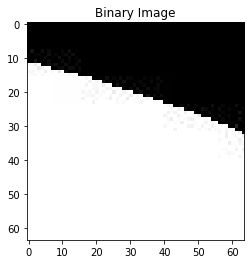

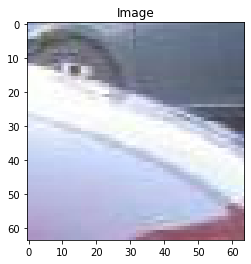

In [479]:
patch_nums = 50
print(np.array(Image.open(df['binary_patch_path'].iloc[patch_nums])).sum())
print(df['binary_patch'].iloc[patch_nums])
# Image.open(df['binary_patch_path'].iloc[patch_nums])
# Image.open(df['img_patch_path'].iloc[patch_nums])

# Load the images
binary_image = Image.open(df['binary_patch_path'].iloc[patch_nums])
img_image = Image.open(df['img_patch_path'].iloc[patch_nums])

# Create a figure and display the first image
plt.figure()
plt.imshow(binary_image)
plt.title('Binary Image')
plt.show()

# Create a new figure and display the second image
plt.figure()
plt.imshow(img_image)
plt.title('Image')
plt.show()

In [481]:
df.to_csv('../../data/csv/all_binary_and_img_patches.csv', index=False)

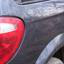

In [277]:
len(os.listdir('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch'))

58153

In [278]:
len(os.listdir('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch'))

58153

In [ ]:
    original_padded_image=Image.open(padded_image_path)
    single_part_mask_image=Image.open(binary_mask_path)
    for point_id in range(len(poly_points)):
        p=poly_points[point_id]
        padded_point=[p[0]+32,p[1]+32]
        original_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/patch/{}#{}#back1.jpg".format(mask_id["label"],point_id)
        masked_img_cropped_path="/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/raw/jpg_json/binary/{}#{}#bin_back1.jpg".format(mask_id["label"],point_id)
        original_img_cropped=original_padded_image.crop((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32)))
        original_img_cropped.save(original_img_cropped_path)
        masked_img_cropped=single_part_mask_image.crop((int(padded_point[0]-32), int(padded_point[1]-32), int(padded_point[0]+32), int(padded_point[1]+32)))
        masked_img_cropped.save(masked_img_cropped_path)

In [186]:
org_point

[115.31249999999999, 298.7109375]

In [188]:
add_pad_to_point[-1]

[147.3125, 330.7109375]

In [190]:
298.7109375+32

330.7109375

In [6]:
import pandas as pd

In [9]:
binary_patch = os.listdir('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/model_train_data/Binary_Mask/')
img_patch = os.listdir('/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/model_train_data/Patches/')

df = pd.DataFrame([binary_patch, img_patch]).T
df.columns = ['binary_patch', 'img_patch']
df['binary_patch_path'] = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/binary_patch/' + df['binary_patch']
df['img_patch_path'] = '/home/cgiuser/rushikesh/projects/boundry_patch_refinement/data/img_patch/' + df['img_patch']
print(df.shape)
df

(280801, 4)


,binary_patch,img_patch,binary_patch_path,img_patch_path
0,window_rear_left#5#CAF4D5A6-27E5-4387-8600-91F...,window_rear_left#5#CAF4D5A6-27E5-4387-8600-91F...,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
1,trunk_cover#5#AB424262-DBD9-4118-B227-3BFF3B56...,trunk_cover#5#AB424262-DBD9-4118-B227-3BFF3B56...,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
2,rear_windshield#13#93012089-0204-493D-9483-10E...,rear_windshield#13#93012089-0204-493D-9483-10E...,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
3,mirror_front_right#13#16BFE403-3F13-4B38-AE23-...,mirror_front_right#13#16BFE403-3F13-4B38-AE23-...,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
4,bumper#8#6A85BACB-6747-46BC-89D8-870A6301CACA.jpg,bumper#8#6A85BACB-6747-46BC-89D8-870A6301CACA.jpg,/home/cgiuser/rushikesh/projects/boundry_patch...,/home/cgiuser/rushikesh/projects/boundry_patch...
...,...,...,...,...
280796,None,window_front_right#4#57E6CA58-9E97-411B-8FAC-0...,NaN,/home/cgiuser/rushikesh/projects/boundry_patch...
280797,None,bumper#13#390E9C5D-E696-4A68-95B6-0055002EB36B...,NaN,/home/cgiuser/rushikesh/projects/boundry_patch...
280798,None,rear_bumper#3#0FFB821C-F537-4519-B204-3FAD3D4B...,NaN,/home/cgiuser/rushikesh/projects/boundry_patch...
280799,None,trunk_cover#22#4515F3C9-09C3-4276-B7CC-8132493...,NaN,/home/cgiuser/rushikesh/projects/boundry_patch...
